In [2]:
from __future__ import division
import numpy as np
import scipy.signal as sg
from scipy.fftpack import rfft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.colors as colors
from pydub import AudioSegment

import utilities as util

In [3]:
sound = AudioSegment.from_wav("../samples/Guitar_C_Major_RAW.wav")
sound = sound.set_channels(1)
sound.export("../samples/Guitar_C_Major_Scale.wav", format="wav")

<_io.BufferedRandom name='../samples/Guitar_C_Major_Scale.wav'>

In [4]:
sound = AudioSegment.from_wav("../samples/Guitar_C_Note_RAW.wav")
sound = sound.set_channels(1)
sound.export("../samples/Guitar_C_Major_Note.wav", format="wav")

<_io.BufferedRandom name='../samples/Guitar_C_Major_Note.wav'>

In [5]:
sound = AudioSegment.from_wav("../samples/Piano_C_Major_RAW.wav")
sound = sound.set_channels(1)
sound.export("../samples/Piano_C_Major_Scale.wav", format="wav")

<_io.BufferedRandom name='../samples/Piano_C_Major_Scale.wav'>

In [6]:
sound = AudioSegment.from_wav("../samples/Piano_C_Note_RAW.wav")
sound = sound.set_channels(1)
sound.export("../samples/Piano_C_Major_Note.wav", format="wav")

<_io.BufferedRandom name='../samples/Piano_C_Major_Note.wav'>

In [7]:
sound = AudioSegment.from_wav("../samples/Trombone_C_Major_RAW.wav")
sound = sound.set_channels(1)
sound.export("../samples/Trombone_C_Major_Scale.wav", format="wav")

<_io.BufferedRandom name='../samples/Trombone_C_Major_Scale.wav'>

In [8]:
sound = AudioSegment.from_wav("../samples/Trombone_C_Note_RAW.wav")
sound = sound.set_channels(1)
sound.export("../samples/Trombone_C_Major_Note.wav", format="wav")

<_io.BufferedRandom name='../samples/Trombone_C_Major_Note.wav'>

In [9]:
fs_bells, wav_bells = wavfile.read('../samples/HandBells.wav')
fs_guitar, wav_guitar = wavfile.read('../samples/Guitar.wav')
fs_piano, wav_piano = wavfile.read('../samples/Piano.wav')
fs_chords, wav_chords = wavfile.read('../samples/Chords.wav')

fs_piano_note,  wav_piano_note  = wavfile.read('../samples/Piano_C_Major_Note.wav')
fs_piano_scale, wav_piano_scale = wavfile.read('../samples/Piano_C_Major_Scale.wav')
fs_guitar_note,  wav_guitar_note  = wavfile.read('../samples/Guitar_C_Major_Note.wav')
fs_guitar_scale, wav_guitar_scale = wavfile.read('../samples/Guitar_C_Major_Scale.wav')
fs_trombone_note,  wav_trombone_note  = wavfile.read('../samples/Trombone_C_Major_Note.wav')
fs_trombone_scale, wav_trombone_scale = wavfile.read('../samples/Trombone_C_Major_Scale.wav')

In [10]:
wav_bells  = wav_bells.astype(np.double)
wav_guitar = wav_guitar.astype(np.double)
wav_piano  = wav_piano.astype(np.double)
wav_chords = wav_chords.astype(np.double)

wav_piano_note  = wav_piano_note.astype(np.double)
wav_piano_scale = wav_piano_scale.astype(np.double)
wav_guitar_note  = wav_guitar_note.astype(np.double)
wav_guitar_scale = wav_guitar_scale.astype(np.double)
wav_trombone_note  = wav_trombone_note.astype(np.double)
wav_trombone_scale = wav_trombone_scale.astype(np.double)

In [11]:
freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=16384)
freq_guitar, time_guitar, spectrogram_guitar = sg.spectrogram(wav_guitar, fs_guitar, nperseg=16384)
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=16384)
freq_chords, time_chords, spectrogram_chords = sg.spectrogram(wav_chords, fs_chords, nperseg=16384)

freq_piano_note,  time_piano_note,  spectrogram_piano_note  = sg.spectrogram(wav_piano_note,  fs_piano_note,  nperseg=16384)
freq_piano_scale, time_piano_scale, spectrogram_piano_scale = sg.spectrogram(wav_piano_scale, fs_piano_scale, nperseg=16384)
freq_guitar_note,  time_guitar_note,  spectrogram_guitar_note  = sg.spectrogram(wav_guitar_note,  fs_guitar_note,  nperseg=16384)
freq_guitar_scale, time_guitar_scale, spectrogram_guitar_scale = sg.spectrogram(wav_guitar_scale, fs_guitar_scale, nperseg=16384)
freq_trombone_note,  time_trombone_note,  spectrogram_trombone_note  = sg.spectrogram(wav_trombone_note,  fs_trombone_note,  nperseg=16384)
freq_trombone_scale, time_trombone_scale, spectrogram_trombone_scale = sg.spectrogram(wav_trombone_scale, fs_trombone_scale, nperseg=16384)

In [12]:
argsort_bells  = np.argsort(spectrogram_bells,  axis=0)
argsort_guitar = np.argsort(spectrogram_guitar, axis=0)
argsort_piano  = np.argsort(spectrogram_piano,  axis=0)
argsort_chords = np.argsort(spectrogram_chords, axis=0)

argsort_piano_note  = np.argsort(spectrogram_piano_note,  axis=0)
argsort_piano_scale = np.argsort(spectrogram_piano_scale, axis=0)
argsort_guitar_note  = np.argsort(spectrogram_guitar_note,  axis=0)
argsort_guitar_scale = np.argsort(spectrogram_guitar_scale, axis=0)
argsort_trombone_note  = np.argsort(spectrogram_trombone_note,  axis=0)
argsort_trombone_scale = np.argsort(spectrogram_trombone_scale, axis=0)

In [13]:
corr_bells,  nf_bells  = util.make_corrections(spectrogram_bells,  freq_bells)
corr_guitar, nf_guitar = util.make_corrections(spectrogram_guitar, freq_guitar)
corr_piano,  nf_piano  = util.make_corrections(spectrogram_piano,  freq_piano)
corr_chords, nf_chords = util.make_corrections(spectrogram_chords, freq_chords)

corr_piano_note,  nf_piano_note  = util.make_corrections(spectrogram_piano_note,  freq_piano_note)
corr_piano_scale, nf_piano_scale = util.make_corrections(spectrogram_piano_scale, freq_piano_scale)
corr_guitar_note,  nf_guitar_note  = util.make_corrections(spectrogram_guitar_note,  freq_guitar_note)
corr_guitar_scale, nf_guitar_scale = util.make_corrections(spectrogram_guitar_scale, freq_guitar_scale)
corr_trombone_note,  nf_trombone_note  = util.make_corrections(spectrogram_trombone_note, freq_trombone_note)
corr_trombone_scale, nf_trombone_scale = util.make_corrections(spectrogram_trombone_scale, freq_trombone_scale)

In [14]:
argsort_bells2  = np.argsort(corr_bells,  axis=0)
argsort_guitar2 = np.argsort(corr_guitar, axis=0)
argsort_piano2  = np.argsort(corr_piano,  axis=0)
argsort_chords2 = np.argsort(corr_chords, axis=0)

argsort_piano_note2  = np.argsort(corr_piano_note,  axis=0)
argsort_piano_scale2 = np.argsort(corr_piano_scale, axis=0)
argsort_guitar_note2  = np.argsort(corr_guitar_note,  axis=0)
argsort_guitar_scale2 = np.argsort(corr_guitar_scale, axis=0)
argsort_trombone_note2  = np.argsort(corr_trombone_note,  axis=0)
argsort_trombone_scale2 = np.argsort(corr_trombone_scale, axis=0)

In [15]:
def display_ratios(corr, argsort, lbl='N/A'):
    plt.plot(corr.max(axis=0)[1:] / [corr[x,i] for i,x in enumerate(argsort[-2][1:], 1)], label=lbl)
    plt.xlabel('Time')
    plt.ylabel('Ratio (Inverted)')
    plt.legend()
    plt.gca().set_aspect('auto')

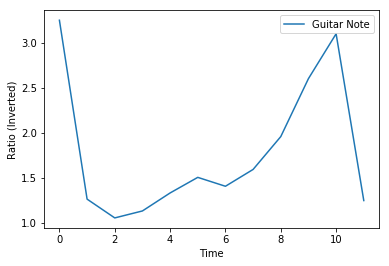

In [80]:
display_ratios(corr_guitar_note, argsort_guitar_note2, 'Guitar Note')

/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


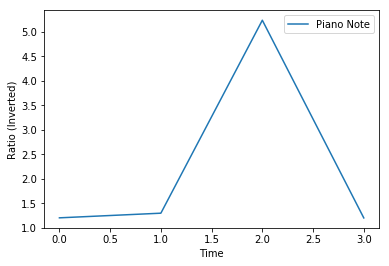

In [81]:
display_ratios(corr_piano_note, argsort_piano_note2, 'Piano Note')

/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


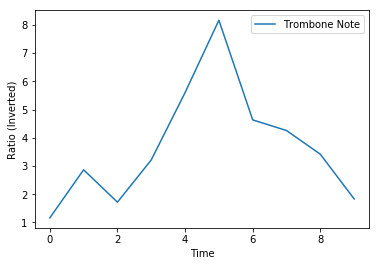

In [82]:
display_ratios(corr_trombone_note, argsort_trombone_note2, 'Trombone Note')

/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


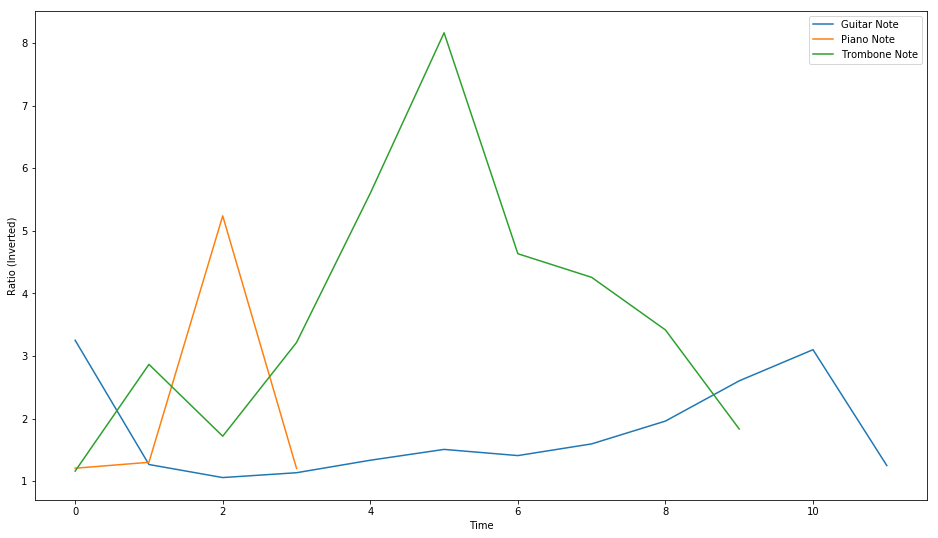

In [88]:
plt.figure(figsize=(16,9))

display_ratios(corr_guitar_note,   argsort_guitar_note2,   'Guitar Note')
display_ratios(corr_piano_note,    argsort_piano_note2,    'Piano Note')
display_ratios(corr_trombone_note, argsort_trombone_note2, 'Trombone Note')

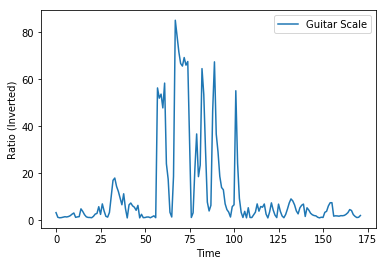

In [83]:
display_ratios(corr_guitar_scale, argsort_guitar_scale2, 'Guitar Scale')

/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


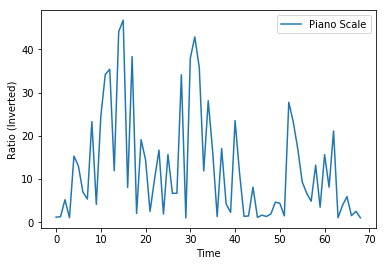

In [84]:
display_ratios(corr_piano_scale, argsort_piano_scale2, 'Piano Scale')

/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


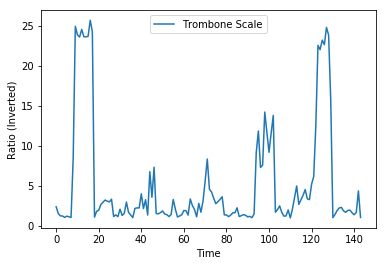

In [85]:
display_ratios(corr_trombone_scale, argsort_trombone_scale2, 'Trombone Scale')

/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


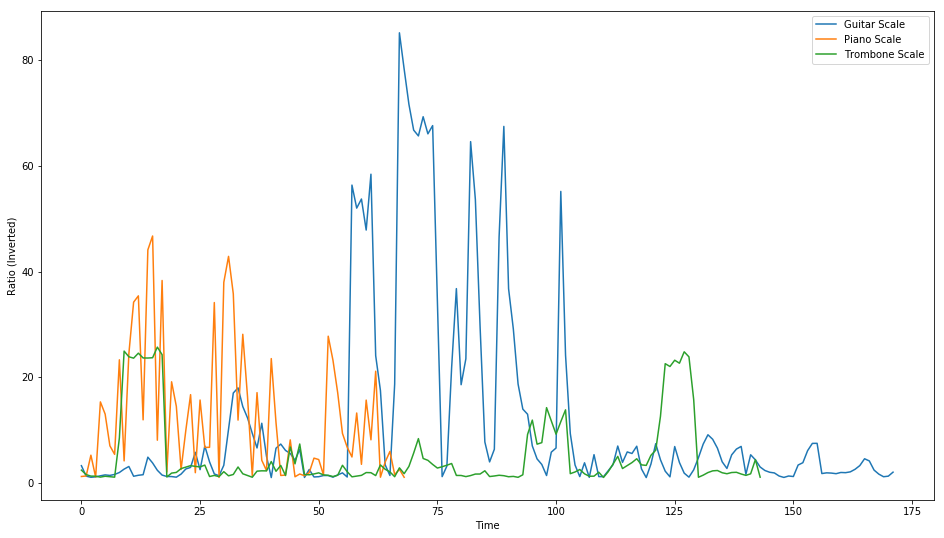

In [87]:
plt.figure(figsize=(16,9))

display_ratios(corr_guitar_scale, argsort_guitar_scale2, 'Guitar Scale')
display_ratios(corr_piano_scale, argsort_piano_scale2, 'Piano Scale')
display_ratios(corr_trombone_scale, argsort_trombone_scale2, 'Trombone Scale')

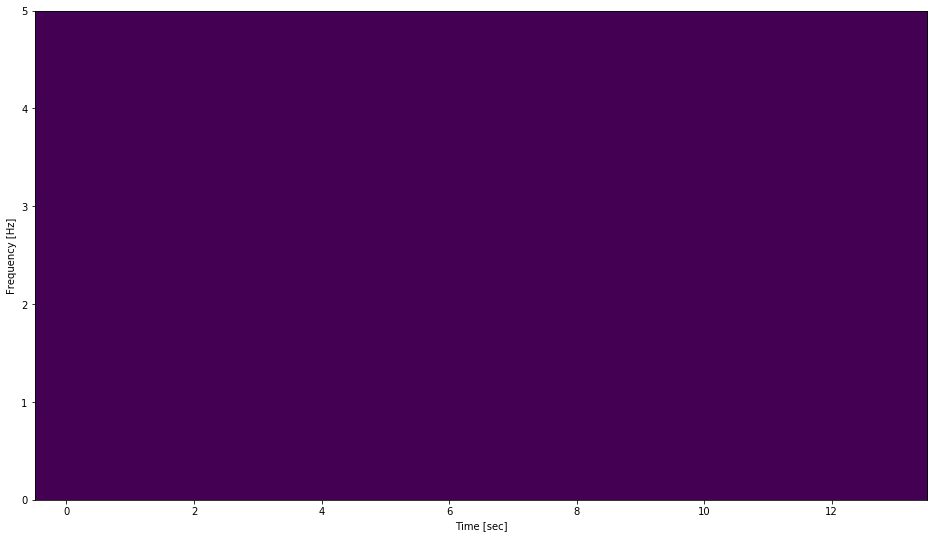

In [18]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_guitar, freq_guitar, spectrogram_guitar)
plt.ylim(0,5)
plt.imshow(spectrogram_guitar)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.gca().set_aspect('auto')
plt.show()